<a href="https://colab.research.google.com/github/parth-gz/Data-Science/blob/main/19%20-%20Logistic%20Regression/log-regression(22%20Jan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#OLS method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [2]:
claimants=pd.read_csv("claimants.csv")


In [3]:
#the 0th column is CASENUM which is not useful,hence drop the column
c1=claimants.drop("CASENUM",axis=1)
c1.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [4]:
c1.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
#let us check the null values
c1.isna().sum()

,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [6]:
#There are several null values around 200
###
#let us use mean imputation for continuous data and mode imputation
#for discrete data
mean_value=c1.CLMAGE.mean()
mean_value

28.414422241529106

In [7]:
c1.CLMAGE=c1.CLMAGE.fillna(mean_value)
c1.CLMAGE.isna().sum()

0

In [8]:
#for descrete value like CLMSEX we need to use the mode imputation
mode_CLMSEX=c1.CLMSEX.mode()
mode_CLMSEX

,CLMSEX
0,1.0


In [9]:
#Here if you will observe the output it is 0 1 i.e
#mode_CLMSEX[0]=0,mode_CLMSEX[1]=1,we are passing mode_CLMSEX[0]
c1.CLMSEX=c1.CLMSEX.fillna((mode_CLMSEX)[0])
c1.CLMSEX.isna().sum()

0

In [10]:
#CLMINSUR
mode_INSUR=c1['CLMINSUR'].mode()
mode_INSUR

,CLMINSUR
0,1.0


In [11]:
c1.CLMINSUR=c1.CLMINSUR.fillna((mode_CLMSEX)[0])
c1.CLMINSUR.isna().sum()

0

In [12]:
#SEATBELT
mode_SB=c1['SEATBELT'].mode()
mode_SB

,SEATBELT
0,0.0


In [13]:
c1.SEATBELT=c1.SEATBELT.fillna((mode_SB)[0])
c1.SEATBELT.isna().sum()

0

In [14]:
#Model building

In [15]:
logit_model=statsmodels.formula.api.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data=c1).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1209
Time:                        09:41:31   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [16]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.121     
Date:               2025-01-23 09:41 AIC:              1644.4709 
No. Observations:   1340             BIC:              1675.6734 
Df Model:           5                Log-Likelihood:   -816.24   
Df Residuals:       1334             LL-Null:          -928.48   
Converged:          1.0000           LLR p-value:      1.6204e-46
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.1493    0.2260   -0.6604  0.5090  -0.5922   0.2937
CLMAGE        0.0066    0.0032    2.0583  0.0396   0.0003   0.0128
LOSS         -0.3228    0.0294  -10.9615  0.0000  -0.3805  -0.2651
CLMINSUR      0.5284    0.2100    2.5159  0.0119   0.1168   0.9400
CLMSEX        0.3204    0.1198    2.6736  0.0075   0.0855   0.5552
SEATBELT     -0.6718    0.5224   -1.2860  0.1984  -1.6958   0.3521
=================================================================

"""

In [17]:
#let's go for predicton
pred=logit_model.predict(c1.iloc[:,1:])
pred

,0
0,0.000026
1,0.500422
2,0.575767
3,0.474743
4,0.637341
...,...
1335,0.593816
1336,0.451543
1337,0.715776
1338,0.309620


In [18]:
#To derive ROC curve

In [19]:
#ROC curve has tpr on y axis and fpr on x axis, ideally, tpr must be high and fpr must be low
fpr,tpr,thresholds=roc_curve(c1.ATTORNEY,pred)

In [20]:
#To identify optimum threshold
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
optimal_threshold

0.5294418043694739

In [21]:
#0.52944, by default you can take 0.5 as the threshold value
#Now you can identify if the new value is given to the model, it will fall in which region i.e. 0 or 1
#for that we need to derive ROC curve
import pylab as pl
i=np.arange(len(tpr))

In [22]:
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
roc
#This code creates a dataframe called roc using pandas
#It organizes various metrics related to the receiver operation characteristics into columns. Each column represents a specific metric

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,inf
1,0.000000,0.001527,1.000000,-0.998473,7.697354e-01
2,0.000000,0.003053,1.000000,-0.996947,7.677087e-01
3,0.001460,0.003053,0.998540,-0.995487,7.591141e-01
4,0.001460,0.007634,0.998540,-0.990907,7.565872e-01
...,...,...,...,...,...
554,0.931387,0.996947,0.068613,0.928333,4.105720e-02
555,0.931387,0.998473,0.068613,0.929860,4.038672e-02
556,0.992701,0.998473,0.007299,0.991174,1.396858e-11
557,0.992701,1.000000,0.007299,0.992701,7.768325e-12


Area under the curve:  0.7601014097063576


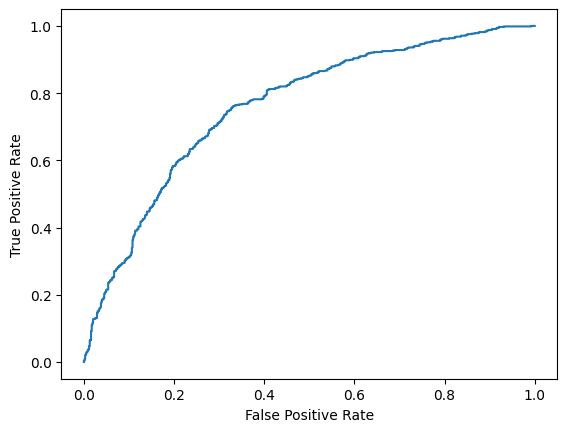

In [23]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
roc_auc=auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Text(0, 0.5, 'True Positive Rate')

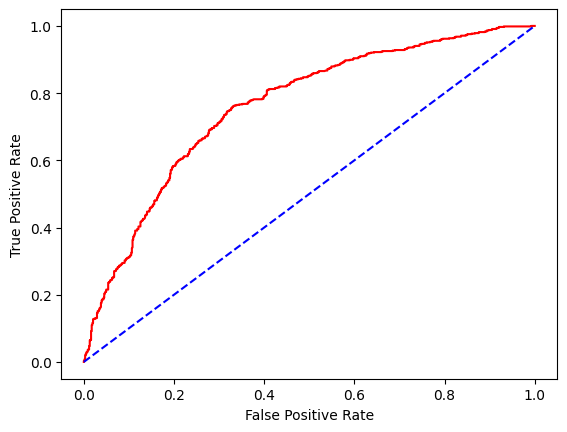

In [24]:
pl.plot(fpr,tpr,color='red')
pl.plot(fpr,fpr,color='blue',linestyle='--')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')

In [25]:
#now let us add prediction column in dataframe
c1['pred']=np.zeros(1340)
c1.loc[pred>optimal_threshold,'pred']=1
c1.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred
0,0,0.0,1.0,0.0,50.0,34.940,0.0
1,1,1.0,0.0,0.0,18.0,0.891,0.0
2,1,0.0,1.0,0.0,5.0,0.330,1.0
3,0,0.0,1.0,1.0,31.0,0.037,0.0
4,1,0.0,1.0,0.0,30.0,0.038,1.0


In [26]:
#Classification report
classification=classification_report(c1.pred,c1.ATTORNEY)
print(classification)

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70       615
         1.0       0.76      0.69      0.72       725

    accuracy                           0.71      1340
   macro avg       0.71      0.72      0.71      1340
weighted avg       0.72      0.71      0.71      1340



In [27]:
#Splitting the data in train and test data
train_data, test_data=train_test_split(c1,test_size=0.3)

In [28]:
#Model building
logit_model1=statsmodels.formula.api.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data=train_data).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.590572
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1480
Time:                        09:41:33   Log-Likelihood:                -553.96
converged:                       True   LL-Null:                       -650.16
Covariance Type:            nonrobust   LLR p-value:                 1.190e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1940      0.280     -0.694      0.488      -0.742       0.354
CLMAGE         0.0095      0.004      2.395      0.017       0.002       0.017
LOSS          -0.3656      0.036    -10.041      0.000      -0.437      -0.294
CLMINSUR       0.5771      0.260      2.222      0.026       0.068       1.086
CLMSEX         0.4293      0.147      2.929      0.003       0.142       0.716
SEATBELT      -0.3724      0.675     -0.552      0.581      -1.695       0.950
==============================================================================
"""

In [29]:
logit_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.148     
Date:               2025-01-23 09:41 AIC:              1119.9122 
No. Observations:   938              BIC:              1148.9747 
Df Model:           5                Log-Likelihood:   -553.96   
Df Residuals:       932              LL-Null:          -650.16   
Converged:          1.0000           LLR p-value:      1.1901e-39
No. Iterations:     8.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.1940    0.2797   -0.6938  0.4878  -0.7422   0.3541
CLMAGE        0.0095    0.0040    2.3946  0.0166   0.0017   0.0173
LOSS         -0.3656    0.0364  -10.0413  0.0000  -0.4370  -0.2942
CLMINSUR      0.5771    0.2597    2.2221  0.0263   0.0681   1.0861
CLMSEX        0.4293    0.1466    2.9290  0.0034   0.1420   0.7165
SEATBELT     -0.3724    0.6749   -0.5518  0.5811  -1.6952   0.9503
=================================================================

"""

In [30]:
#AIC is 1162.32
#Prediction on test data
test_pred=logit_model1.predict(test_data)
test_data["test_pred"]=np.zeros(402)
#taking threshold value as optimal threshold value
test_data.loc[test_pred>optimal_threshold,"test_pred"]=1

In [31]:
#Confusion matrix
confusion_matrix=pd.crosstab(test_data.test_pred,test_data.ATTORNEY)
confusion_matrix

ATTORNEY,0,1
test_pred,,
0.0,143,41
1.0,75,143


In [32]:
accuracy=(131+151)/(131+151+62+58)
#Denotes (tp+tn)/(tp+tn+fp+fn)
#Equivalent to accuracy=(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/(confusion_matrix.iloc[0,0]+confusion_matrix.iloc[0,1]+confusion_matrix.iloc[1,0]+confusion_matrix.iloc[1,1])
accuracy

0.7014925373134329

In [33]:
#classification report
classification_test=classification_report(test_data.test_pred,test_data.ATTORNEY)
print(classification_test)

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.71       184
         1.0       0.78      0.66      0.71       218

    accuracy                           0.71       402
   macro avg       0.72      0.72      0.71       402
weighted avg       0.72      0.71      0.71       402



In [34]:
#ROC curve and AUC
fpr1,tpr1,thresholds1=roc_curve(test_data.ATTORNEY,test_pred)

Text(0, 0.5, 'True Positive Rate')

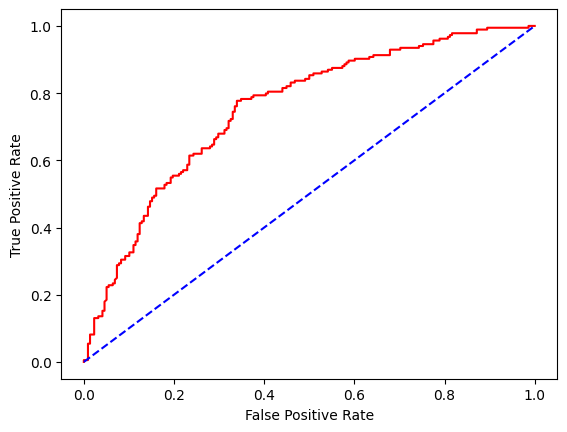

In [35]:
#Plot of ROC
plt.plot(fpr1,tpr1,color='red')
plt.plot(fpr1,fpr1,color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
roc_auc_test=metrics.auc(fpr1,tpr1)
print("Area under the curve: ",roc_auc_test)

Area under the curve:  0.7531412046270443


In [37]:
#prediction on train data
train_pred=logit_model1.predict(train_data.iloc[:,1:])
#creating new column
train_data["train_pred"]=np.zeros(938)
train_data.loc[train_pred>optimal_threshold,"train_pred"]=1


In [38]:
#Confusion matrix
confusion_matrix_train=pd.crosstab(train_data.train_pred,train_data.ATTORNEY)
confusion_matrix_train

ATTORNEY,0,1
train_pred,,
0.0,308,110
1.0,159,361


In [39]:
#Accuracy test
accuracy_train=(308+361)/(308+361+159+110)
accuracy_train

0.7132196162046909

In [40]:
#Classification report
classification_train=classification_report(train_data.train_pred,train_data.ATTORNEY)
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70       418
         1.0       0.77      0.69      0.73       520

    accuracy                           0.71       938
   macro avg       0.71      0.72      0.71       938
weighted avg       0.72      0.71      0.71       938



In [41]:
#ROC AUC curve
fpr2,tpr2,thresholds2=roc_curve(train_data.ATTORNEY,train_pred)

Text(0, 0.5, 'True Positive Rate')

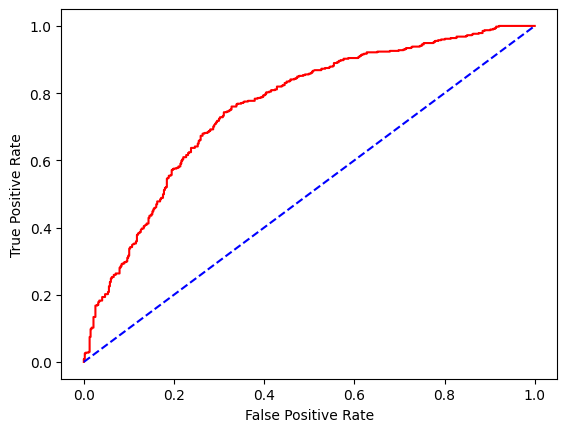

In [42]:
plt.plot(fpr2,tpr2,color='red')
plt.plot(fpr2,fpr2,color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [43]:
roc_auc_train=metrics.auc(fpr2,tpr2)
print("Area under the curve: ",roc_auc_train)

Area under the curve:  0.7598030524147902
